In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv("covid.csv")

In [3]:
data.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97
1,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,99,1,97
2,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,2,...,2,2,2,2,1,2,2,99,1,2
3,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,2,...,2,2,2,2,2,2,2,99,1,2
4,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,...,2,1,2,1,2,2,2,99,1,2


# Univariate Selection

In [4]:
X = data.iloc[:, [True, True,False,False, False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]] #independent columns
y = data.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  

                  Specs         Score
18                  icu  1.129023e+07
2               intubed  1.128978e+07
16  contact_other_covid  2.159049e+06
4                   age  3.910686e+05
5             pregnancy  2.350391e+05
1          patient_type  7.873956e+04
3             pneumonia  1.742447e+04
11        other_disease  9.757021e+03
9               inmsupr  3.907625e+03
8                asthma  3.876542e+03


# Feature Importance

[1.29635748e-03 4.02591865e-01 2.50787990e-01 1.62194356e-03
 8.00570211e-03 5.71253962e-04 1.50788140e-04 4.07920812e-05
 4.42525391e-05 5.40717796e-05 5.68556132e-04 1.89782806e-04
 3.27291645e-04 1.56865103e-04 1.59485132e-04 4.29729704e-05
 1.25336875e-02 3.24368836e-03 3.17612653e-01]


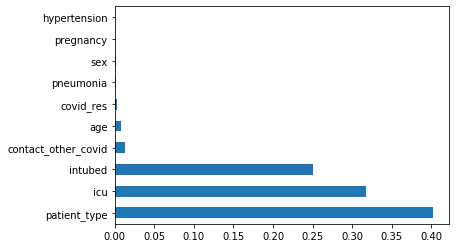

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

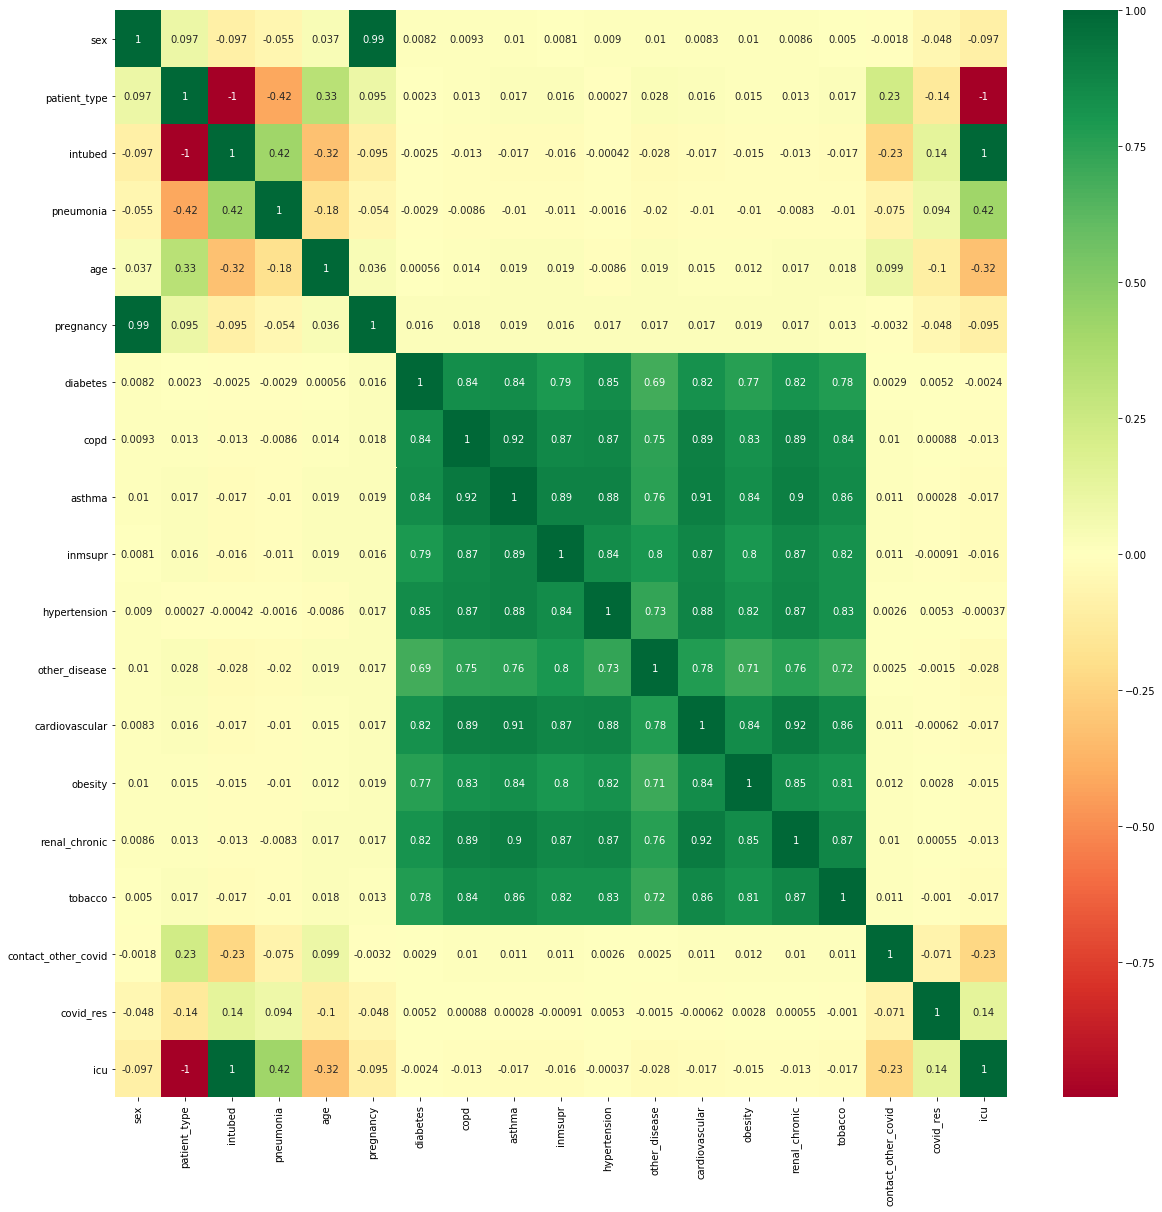

In [6]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")